In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [5]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22906,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


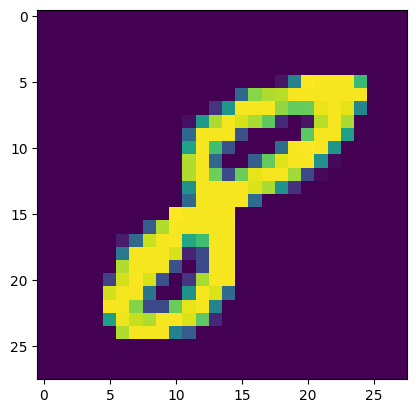

In [13]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[22906,1:].values.reshape(28,28))

In [15]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape

(33600, 784)

In [91]:
from sklearn.neighbors import KNeighborsClassifier


In [93]:
knn=KNeighborsClassifier()

In [94]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [95]:
import time
start=time.time()

y_pred=knn.predict(x_test)
print(time.time()-start)

0.008093595504760742


In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.425

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

pca

In [111]:
from sklearn.decomposition import PCA
pca=PCA(n_components=40)

In [112]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.fit_transform(x_test)

In [113]:
x_train_trf.shape

(160, 40)

In [114]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [115]:
y_pred=knn.predict(x_test_trf)

In [116]:
accuracy_score(y_test,y_pred)

0.4

In [81]:
# for i in range(1,785):
#     pca=PCA(n_components=i)
#     x_train_trf=pca.fit_transform(x_train)
#     x_test_trf=pca.transform(x_test)

#     knn=KNeighborsClassifier()
#     knn.fit(x_train_trf,y_train)
#     y_pred=knn.predict(x_test_trf)

In [119]:
# transforming to a 2D coordinate system
pca=PCA(n_components=2)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [118]:
x_train_trf

array([[-2.51901802e-01,  6.31740332e-01],
       [-2.45086881e-01, -1.96074193e+00],
       [ 1.32420738e+00, -8.84157982e-01],
       [-1.55409337e+00,  4.94154270e-01],
       [ 8.47292792e-01, -1.00063281e+00],
       [ 2.54260393e-01,  5.18972434e-01],
       [ 2.87627449e+00,  1.69553701e-03],
       [ 7.50474241e-02, -1.39418746e+00],
       [ 7.35117165e-02, -5.18662057e-01],
       [ 2.11322846e-01, -7.20800728e-01],
       [ 1.18104215e+00, -1.77923967e+00],
       [-2.59934886e+00, -3.48947683e+00],
       [ 1.14883569e+00,  1.53469889e+00],
       [-1.94984549e+00,  1.06901328e+00],
       [-1.18270192e+00, -1.88964805e+00],
       [ 2.05765900e+00,  6.42938659e-01],
       [-9.75157653e-01,  3.85633792e+00],
       [-6.66395922e-01,  2.98251217e-01],
       [ 5.20193010e-02, -2.75056407e+00],
       [ 2.11004296e+00, -1.68294221e-01],
       [ 9.26469538e-01, -1.63570355e+00],
       [-4.35199143e+00,  3.28740146e-01],
       [ 1.01195790e+00, -1.22771491e+00],
       [-2.

In [120]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=x_train_trf[:,0],
             y=x_train_trf[:,1],
             color=y_train_trf,
             color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [72]:
import numpy as np
import plotly.express as px

# Create dummy data for x_train and y_train
x_train = np.random.rand(100, 2)  # 100 samples with 2 features
y_train = np.random.randint(0, 2, 100) # 100 labels (0 or 1)

# Convert y_train to string for discrete coloring
y_train_trf = y_train.astype(str)

# Plot the data
fig = px.scatter(
    x=x_train[:, 0],
    y=x_train[:, 1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

# Show the plot
fig.show()

In [121]:
# transforming in 3D
pca=PCA(n_components=3)
x_trian_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [122]:
x_train_trf

array([[-2.51901802e-01,  6.31740332e-01],
       [-2.45086881e-01, -1.96074193e+00],
       [ 1.32420738e+00, -8.84157982e-01],
       [-1.55409337e+00,  4.94154270e-01],
       [ 8.47292792e-01, -1.00063281e+00],
       [ 2.54260393e-01,  5.18972434e-01],
       [ 2.87627449e+00,  1.69553701e-03],
       [ 7.50474241e-02, -1.39418746e+00],
       [ 7.35117165e-02, -5.18662057e-01],
       [ 2.11322846e-01, -7.20800728e-01],
       [ 1.18104215e+00, -1.77923967e+00],
       [-2.59934886e+00, -3.48947683e+00],
       [ 1.14883569e+00,  1.53469889e+00],
       [-1.94984549e+00,  1.06901328e+00],
       [-1.18270192e+00, -1.88964805e+00],
       [ 2.05765900e+00,  6.42938659e-01],
       [-9.75157653e-01,  3.85633792e+00],
       [-6.66395922e-01,  2.98251217e-01],
       [ 5.20193010e-02, -2.75056407e+00],
       [ 2.11004296e+00, -1.68294221e-01],
       [ 9.26469538e-01, -1.63570355e+00],
       [-4.35199143e+00,  3.28740146e-01],
       [ 1.01195790e+00, -1.22771491e+00],
       [-2.

In [123]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=x_train_trf[:,0],y=x_train_trf[:,1],z=x_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [124]:
pca.explained_variance_

array([3.15347241, 2.84523954, 2.72694211])

In [125]:
pca.components_.shape

(3, 100)

In [128]:
pca.explained_variance_ratio_

array([0.03133763, 0.02827457, 0.02709899])

In [129]:
pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [130]:
pca.explained_variance_.shape

(100,)

In [131]:
pca.components_.shape

(100, 100)

In [133]:
np.cumsum(pca.explained_variance_ratio_)


array([0.03133763, 0.0596122 , 0.08671119, 0.11355201, 0.13987966,
       0.16539868, 0.19053454, 0.21533531, 0.23818939, 0.26074024,
       0.28201349, 0.30313663, 0.32355585, 0.34354463, 0.36339565,
       0.3822785 , 0.40111517, 0.41937545, 0.43687228, 0.45373354,
       0.47035586, 0.48691286, 0.5030252 , 0.51867141, 0.53419788,
       0.54951133, 0.56429353, 0.57870962, 0.59251775, 0.60592749,
       0.61918958, 0.63213382, 0.64496059, 0.65742212, 0.66965214,
       0.68173987, 0.69340371, 0.70463492, 0.71562638, 0.72642776,
       0.73702632, 0.74712196, 0.75700595, 0.76669837, 0.77623604,
       0.78558114, 0.79453706, 0.80325526, 0.81165178, 0.8196834 ,
       0.82731282, 0.83478079, 0.84204551, 0.84914664, 0.85623877,
       0.86301975, 0.86973167, 0.87616326, 0.88235152, 0.88844407,
       0.89411801, 0.89970036, 0.90501394, 0.91005536, 0.91493511,
       0.91978844, 0.92449549, 0.92883785, 0.93306299, 0.93718909,
       0.9411186 , 0.94480363, 0.94840254, 0.95195586, 0.95526

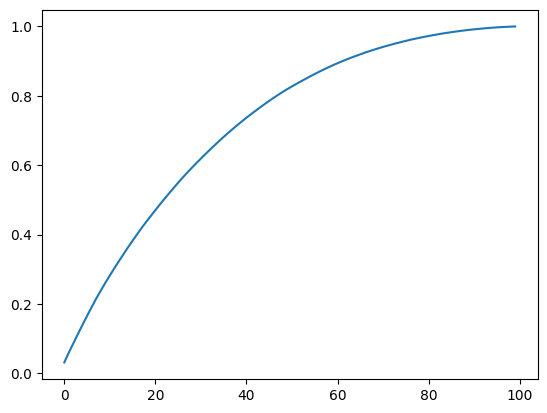

In [134]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))